In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns

In [3]:
df = pd.read_csv("boston.csv")


In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: xlabel='ZN', ylabel='MEDV'>

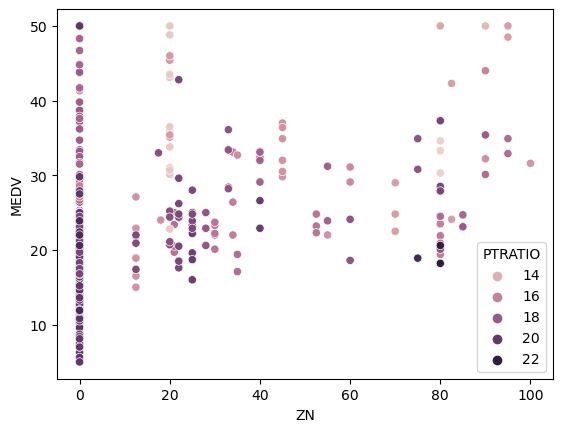

In [7]:
sns.scatterplot(x = df["ZN"],y= df["MEDV"],hue=df["PTRATIO"])

In [8]:
x = df.drop(columns=["MEDV"],axis=1)
x.head()
y = df["MEDV"]

#### Scaling the data

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)


#### Splitting the data

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_x,y,test_size=0.3,random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor


In [13]:
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

In [14]:
prediction = regressor.predict(x_test)

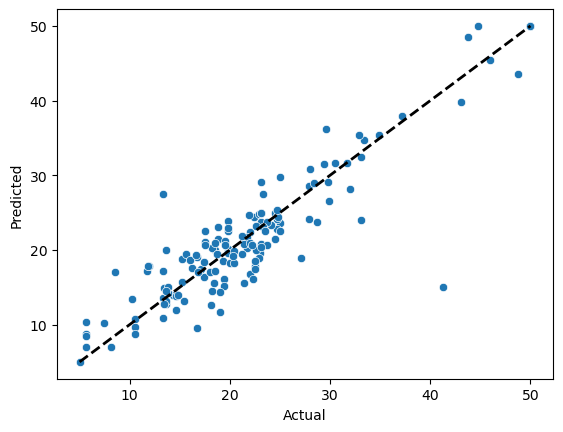

In [15]:
# The plot should be closer to y=x line

sns.scatterplot(x = prediction ,y=y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

##### Plotting for residuals

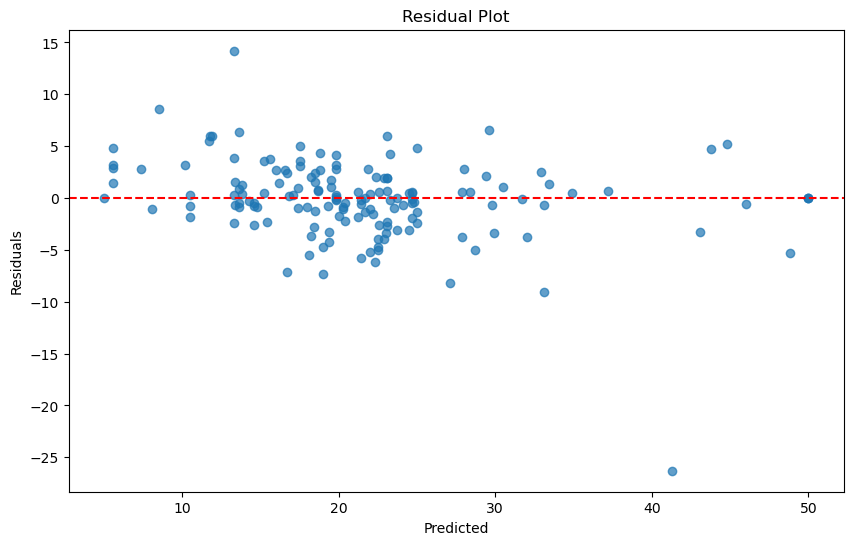

In [16]:
# residuals should be randomly scattered around 0

residuals = y_test -prediction
plt.figure(figsize=(10, 6))
plt.scatter(prediction, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

##### Distribution of residuals

c:\Users\Sundram\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


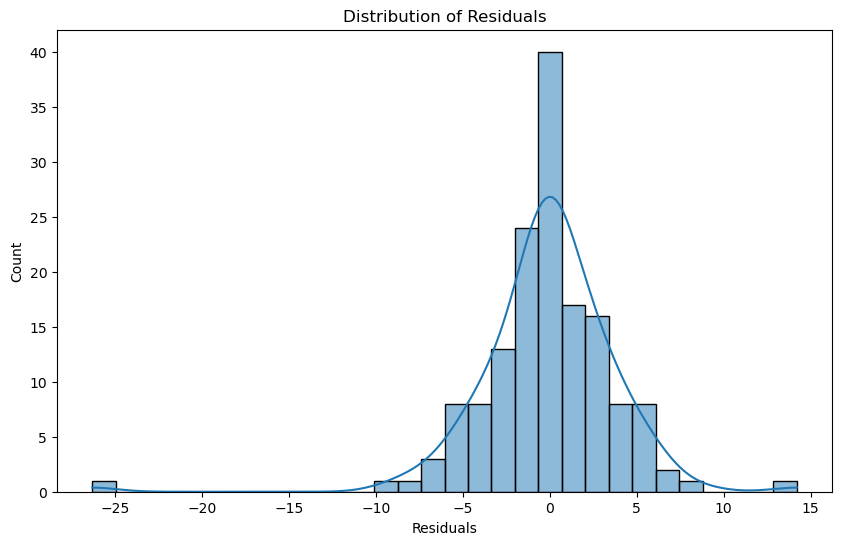

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [19]:
mae = mean_absolute_error(y_test,prediction)
print(f"Mean absolut error it:{mae}")

mse = mean_squared_error(y_test,prediction)
print(f"Mean Square error is:{mse}")  

r2 = r2_score(y_test,prediction)
print(f"r2 error is:{r2}")  


Mean absolut error it:2.5802631578947373
Mean Square error is:15.390394736842103
r2 error is:0.7934538268803444


## Random Forest Model


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
regressionForest = RandomForestRegressor(n_estimators=500)
regressionForest.fit(x_train,y_train)

RandomForestRegressor(n_estimators=500)

In [22]:
predict_forest = regressionForest.predict(x_test)

#### Plot of both Predictions

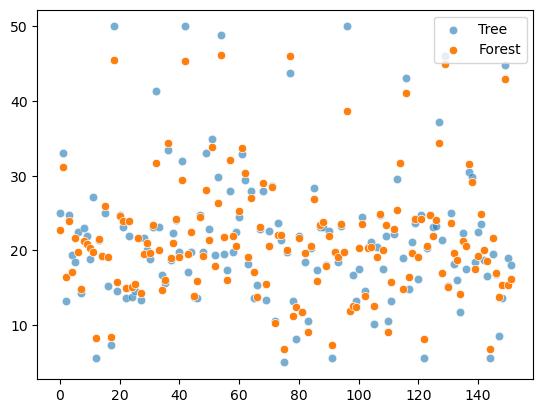

In [28]:
sns.scatterplot(prediction,label = "Tree",alpha = 0.6)
sns.scatterplot(predict_forest,label = "Forest")
plt.show()

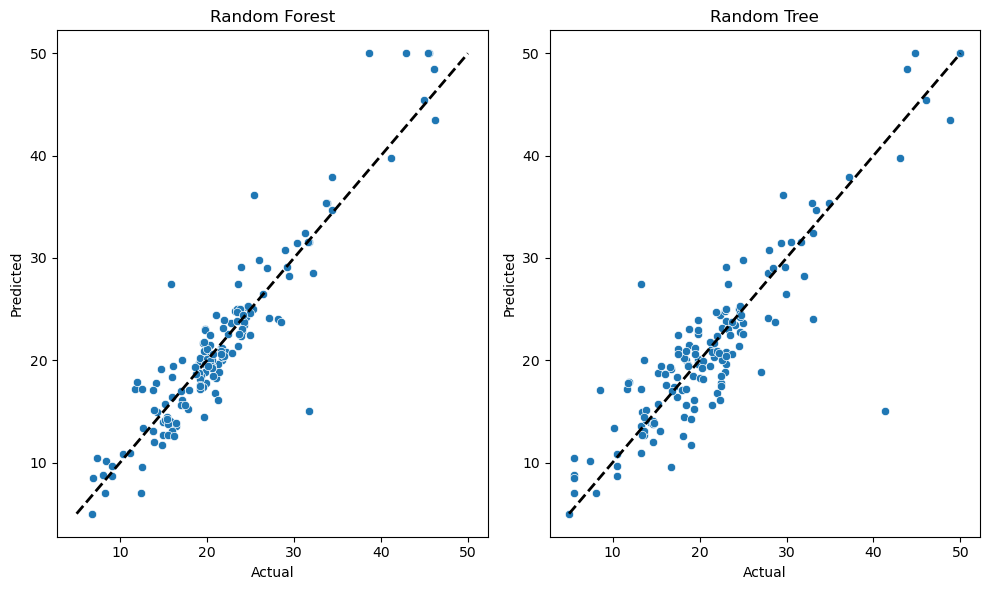

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot the first subplot for Random Forest
sns.scatterplot(x=predict_forest, y=y_test, ax=ax[0])
ax[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[0].set_xlabel('Actual')
ax[0].set_ylabel('Predicted')
ax[0].set_title('Random Forest')

# Plot the second subplot for Random Tree
sns.scatterplot(x=prediction, y=y_test, ax=ax[1])
ax[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax[1].set_xlabel('Actual')
ax[1].set_ylabel('Predicted')
ax[1].set_title('Random Tree')

# Show the plots
plt.tight_layout()
plt.show()

In [39]:
forest_residuals = predict_forest - y_test

c:\Users\Sundram\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Sundram\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


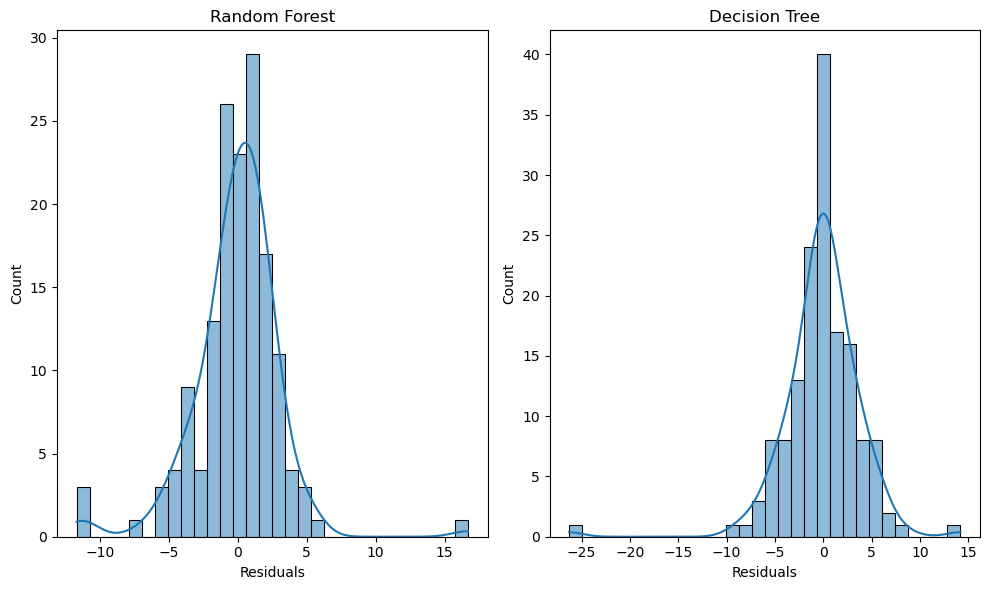

In [45]:
fig,ax = plt.subplots(1,2, figsize = (10,6))
sns.histplot(forest_residuals,kde = True,bins =30 ,ax=ax[0])
ax[0].set_xlabel("Residuals")
ax[0].set_title("Random Forest")

sns.histplot(residuals, kde=True, bins=30,ax=ax[1])
ax[1].set_xlabel("Residuals")
ax[1].set_title("Decision Tree")

plt.tight_layout()
plt.show()

In [46]:
mae = mean_absolute_error(y_test,predict_forest)
print(f"Mean absolut error it:{mae}")

mse = mean_squared_error(y_test,predict_forest)
print(f"Mean Square error is:{mse}")  

r2 = r2_score(y_test,predict_forest)
print(f"r2 error is:{r2}") 

Mean absolut error it:2.080290789473688
Mean Square error is:9.504873369736844
r2 error is:0.8724402295019438
